In [24]:
import netCDF4 as nc
import numpy as np
with nc.Dataset('/Users/mgrecu/AirborneData/IMPACTS2023_HIWRAP_KU_L1B_Rev-_20230115.h5') as f:
    print(f)
    time_Ku=f["Time/Data/TimeUTC"][:]
    #return None
    #dbz_ka=f["Products/Ka/Combined/Data/dBZe"][n1:n2,:]
    n1=time_Ku.shape[0]//2
    n2=n1*2
    n1=n1+8000
    n2=n1+2000
    dbz_ku=f["Products/Combined/Data/dBZe"][n1:n2,:]
    ldr=f["Products/Combined/Data/LDR"][n1:n2,:]
    lon=f["Navigation/Data/Longitude"][n1:n2]
    lat=f["Navigation/Data/Latitude"][n1:n2]
    height=f["Navigation/Data/Height"][n1:n2]
    vdop=f["Products/Combined/Data/Velocity_corrected"][n1:n2,:]
    time_Ku=time_Ku[n1:n2]
    radar_range=f["Products/Information/Range"][:]
    print(f['Time/Information/TimeUTC_description'][:])

with nc.Dataset('/Users/mgrecu/AirborneData/IMPACTS2023_HIWRAP_KA_L1B_Rev-_20230115.h5') as f:
    #print(f)
    time_Ka=f["Time/Data/TimeUTC"][:]
    a=np.nonzero((time_Ka-time_Ku[0]+10)*(time_Ka-time_Ku[-1]-10)<=0)
    n1=a[0][0]
    n2=a[0][-1]
    time_Ka=time_Ka[n1:n2]
    dbz_ka=f["Products/Combined/Data/dBZe"][n1:n2,:]
    lon_ka=f["Navigation/Data/Longitude"][n1:n2]
    lat_ka=f["Navigation/Data/Latitude"][n1:n2]
    height_ka=f["Navigation/Data/Height"][n1:n2]
    ldr_ka=f["Products/Combined/Data/LDR"][n1:n2,:]
    radar_range_ka=f["Products/Information/Range"][:]

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: Information, Navigation, Products, Time
['UTC profile time in Unix Epoch format (seconds since 1970). Obtained from aircraft NTP']


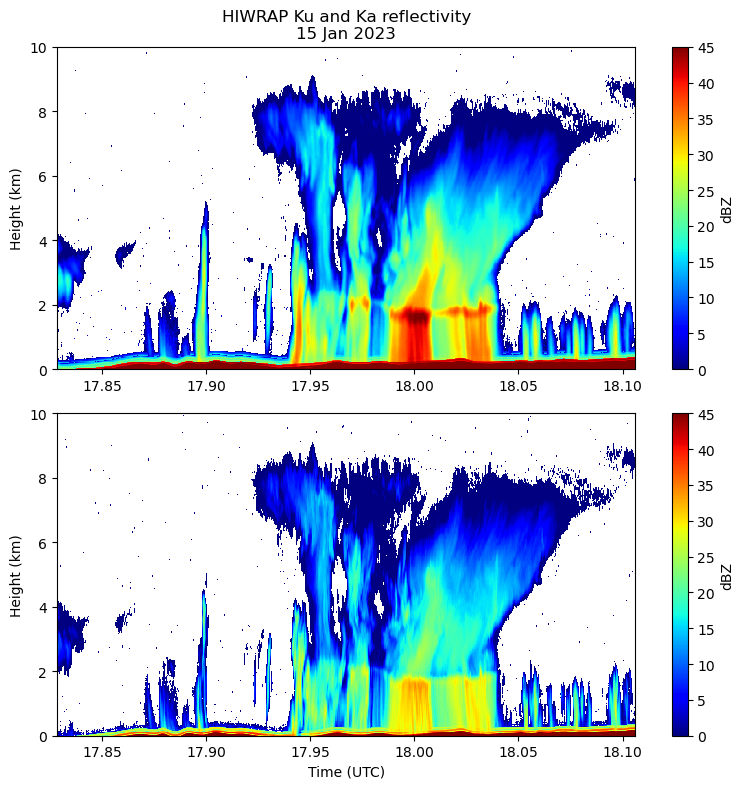

In [25]:
import matplotlib.pyplot as plt
import numpy as np
havg=np.mean(height)
h=havg-radar_range
plt.figure(figsize=(8,8))
import datetime
dt=datetime.datetime(2023,1,15,0,0,0)-datetime.datetime(1970,1,1,0,0,0)
t0=dt.total_seconds()
plt.subplot(211)
plt.pcolormesh((time_Ku-t0)/3600.,h/1e3,dbz_ku[:,:].T,vmin=0,vmax=45,cmap='jet')
plt.title('HIWRAP Ku and Ka reflectivity\n15 Jan 2023')
plt.ylim(0,10)
plt.ylabel('Height (km)')
plt.colorbar(label='dBZ')
#plt.figure()
#plt.plot(height)

zKaL=[]
for t1 in time_Ku:
    ind=np.argmin(np.abs(time_Ka-t1))
    zKaL.append(dbz_ka[ind,:])

havg_ka=np.mean(height_ka)
h_ka=havg_ka-radar_range_ka
plt.subplot(212)
plt.pcolormesh((time_Ku-t0)/3600.,h_ka/1e3,np.array(zKaL).T,vmin=0,vmax=45,cmap='jet')
plt.ylabel('Height (km)')
plt.ylim(0,10.)
plt.colorbar(label='dBZ')
plt.xlabel('Time (UTC)')
plt.tight_layout()
plt.savefig('KuKaReflectivity_15Jan2023.png')


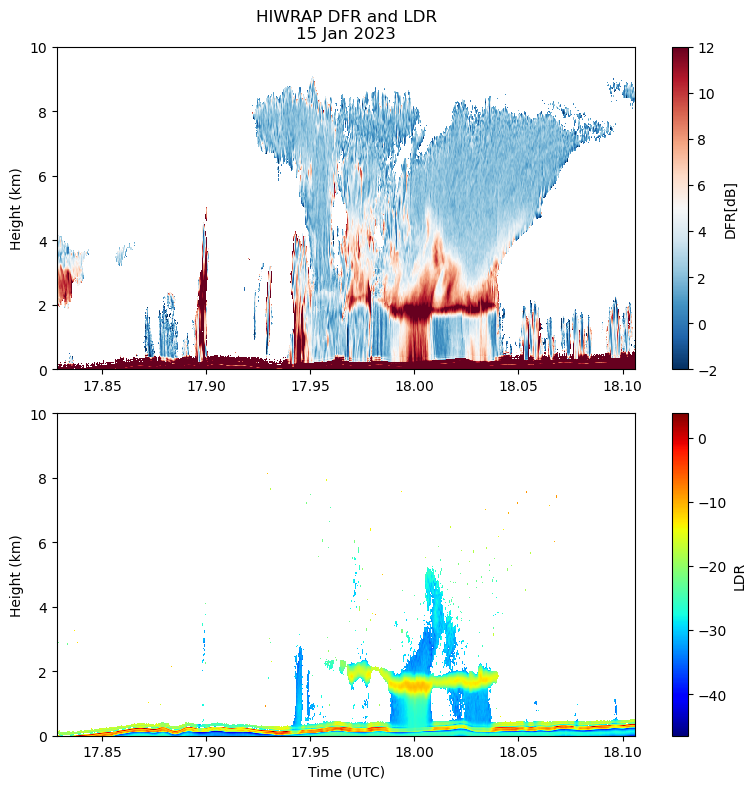

In [268]:
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.pcolormesh((time_Ku-t0)/3600,h/1e3,(dbz_ku[:,:]-zKaL).T,vmin=-2,vmax=12,cmap='RdBu_r')
plt.title('HIWRAP DFR and LDR\n15 Jan 2023')
plt.ylabel('Height (km)')
#plt.xlabel('Time (UTC)')
plt.ylim(0,10)
plt.colorbar(label='DFR[dB]')
plt.subplot(212)
plt.pcolormesh((time_Ku-t0)/3600,h_ka/1e3,(ldr).T,cmap='jet')
plt.ylim(0,10)
plt.ylabel('Height (km)')
plt.xlabel('Time (UTC)')
plt.colorbar(label='LDR')
plt.tight_layout()
plt.savefig('KuKaDFR_LDR_15Jan2023.png')


(2039, 609)
(609,)
2039


<Figure size 1000x1000 with 0 Axes>

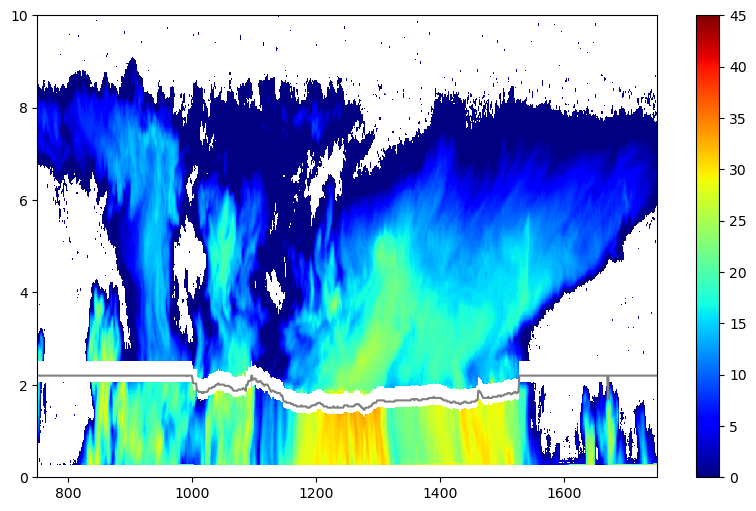

In [31]:
havg_ka=np.mean(height_ka)
h_ka=havg_ka-radar_range_ka
n_ka=dbz_ka.shape[0]
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
print(dbz_ka.shape)
print(h_ka.shape)
print(n_ka)

ml_height=[2.2 for i in range(n_ka)]
a=np.nonzero((h_ka/1e3-2.2)*(h_ka/1e3-1.2)<0)
ml_heigtKu=[2.2 for i in range(2000)]
zKu1L=[]
zKa1L=[]
iend=a[0][0]
lonL=[]
latL=[]
time_retL=[]
dbz_ka_blanked=np.copy(dbz_ka)
ml_L=[]
cl_L=[]
top_L=[] 
zKuSegL=[]
zKaSegL=[] 
for i in range(2000):
    b=np.nonzero(ldr[i,a[0]]==ldr[i,a[0]])
    if len(b[0])>0:
        ind=np.argmax(ldr[i,a[0][b]])
    
    
        if ldr[i,a[0][b]][ind]>-20:
            ml_heigtKu[i]=h_ka[a][b][ind]/1e3
        if i>750 and i<1850:
            iend=a[0][b][ind]
            istart=iend-300
            zKu1L.append(dbz_ku[i,istart:iend])
            zKa1L.append(zKaL[i][istart:iend])
            lonL.append(lon[i])
            latL.append(lat[i])
            time_retL.append(time_Ku[i])
    else:
        if i>750 and i<1850:
            istart=iend-300
            zKu1L.append(dbz_ku[i,istart:iend])
            zKa1L.append(zKaL[i][istart:iend])
            lonL.append(lon[i])
            latL.append(lat[i])
            time_retL.append(time_Ku[i])
    ablank=np.nonzero(h_ka/1e3<ml_heigtKu[i])
    dbz_ka_blanked[i,ablank[0][0]-12:ablank[0][0]+5]=np.nan
    aclutter=np.nonzero(h_ka/1e3<0.25)
    dbz_ka_blanked[i,aclutter[0]]=np.nan
    ml_L.append([ablank[0][0]-12,ablank[0][0]+5])
    zKuSegL.append(dbz_ku[i,:])
    zKaSegL.append(zKaL[i])
    cl_L.append(aclutter[0][0])
    atop=np.nonzero(h_ka/1e3>9)
    top_L.append(atop[0][-1])
#plt.plot(range(n_ka),ml_height,'k')
plt.figure(figsize=(10,6))
plt.subplot(111)
plt.pcolormesh(range(n_ka),h_ka/1e3,dbz_ka_blanked[:,:].T,vmin=0,vmax=45,cmap='jet')
plt.plot(range(2000),ml_heigtKu,'gray')
plt.ylim(0,10)
plt.xlim(750,1750)
plt.colorbar()



(2000, 609)
(2000, 609)
(2000, 2)
(2000,)
(2000,)
(2000,)
(2000,)
(2000,)


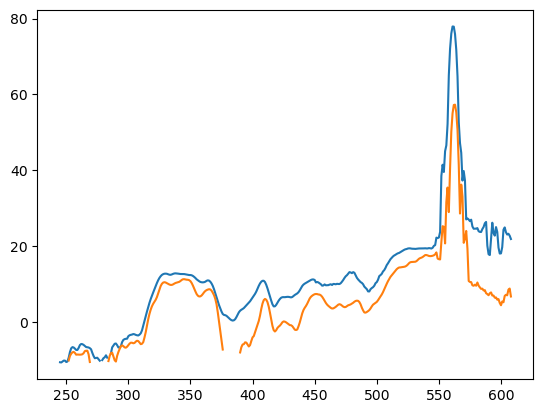

In [37]:
plt.plot(zKuSegL[1000])
plt.plot(zKaSegL[1000])
import xarray as xr
zKuSegXR=xr.DataArray(zKuSegL,dims=['time','range'])
zKaSegXR=xr.DataArray(zKaSegL,dims=['time','range'])
mlXR=xr.DataArray(ml_L,dims=['time','n2'])
clXR=xr.DataArray(cl_L,dims=['time'])
topXR=xr.DataArray(top_L,dims=['time'])
lonXR=xr.DataArray(lon,dims=['time'])
latXR=xr.DataArray(lat,dims=['time'])
timeXR=xr.DataArray(time_Ku,dims=['time'])
print(zKuSegXR.shape)
print(zKaSegXR.shape)
print(mlXR.shape)
print(clXR.shape)
print(topXR.shape)
print(lonXR.shape)
print(latXR.shape)
print(timeXR.shape)
ds=xr.Dataset({'zKu':zKuSegXR,'zKa':zKaSegXR,'ml':mlXR,'cl':clXR,'top':topXR,'lon':lonXR,'lat':latXR,'time':timeXR})
comp = dict(zlib=True, complevel=5)
encoding={'zKu':comp,'zKa':comp,'ml':comp,'cl':comp,'top':comp,'lon':comp,'lat':comp,'time':comp}
ds.to_netcdf('IMPACTS2023_HIWRAP_KuKa_15Jan2023.nc',encoding=encoding)

26.25
393.75


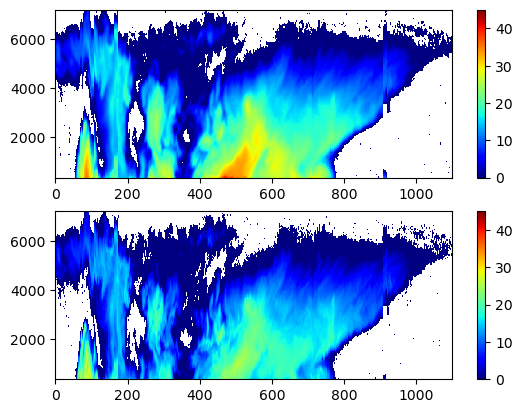

In [102]:
plt.subplot(211)
plt.pcolormesh(range(len(zKu1L)),radar_range[:300]-radar_range[0],np.array(zKu1L)[:,::-1].T,vmin=0,vmax=45,cmap='jet')
plt.ylim(350,7200)
print(radar_range[1]-radar_range[0])
print(26.25*15)
plt.colorbar()
plt.subplot(212)
plt.pcolormesh(range(len(zKa1L)),radar_range[:300]-radar_range[0],np.array(zKa1L)[:,::-1].T,vmin=0,vmax=45,cmap='jet')
plt.ylim(350,7200)
plt.colorbar()

import xarray as xr
zKuX=xr.DataArray(np.array(zKu1L),dims=['time','range'])
zKaX=xr.DataArray(np.array(zKa1L),dims=['time','range'])
rangeX=radar_range[:300]
ds=xr.Dataset({'zKu':zKuX,'zKa':zKaX,'range':rangeX})
encoding = {'zKu': {'zlib': True, 'complevel': 5},
            'zKa': {'zlib': True, 'complevel': 5},
            'range': {'zlib': True, 'complevel': 5}}
ds.to_netcdf('zKu_zKa.nc')

In [161]:
fh=nc.Dataset("simulatedZ_impacts2020_Kuo.nc");
vars="Nw,dm,iwc,iwc_ncar,tempC,zKu,attKu,kextKu,kscatKu,gKu,Ka,attKa,kextKa,kscatKa,gKa,zW,attW,kextW,kscatW,gW"
psd_Data=fh.variables['psd_Data'][:]
Nw=psd_Data[:,0]
dm=psd_Data[:,1]
iwc=psd_Data[:,2]
tempC=psd_Data[:,4]
zKuDB=psd_Data[:,5]
attKuDB=psd_Data[:,6]
zKaDB=psd_Data[:,10]
attKaDB=psd_Data[:,11]
x=[zKuDB+np.random.randn(zKuDB.shape[0])*0.5,zKaDB+np.random.randn(zKaDB.shape[0])*2]
y=[np.log10(1+iwc/1e-2),dm,attKuDB,attKaDB]
x=np.array(x).T
y=np.array(y).T
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=45)
knn.fit(x_train, y_train)

In [327]:
zKu1L=np.array(zKu1L)
zKa1L=np.array(zKa1L)
a=np.nonzero((zKu1L==zKu1L)*(zKa1L==zKa1L))
x=np.array([zKu1L[a],zKa1L[a]]).T
print(x.shape)
yout=knn.predict(x)
print(len(time_retL))

(200200, 2)
1099


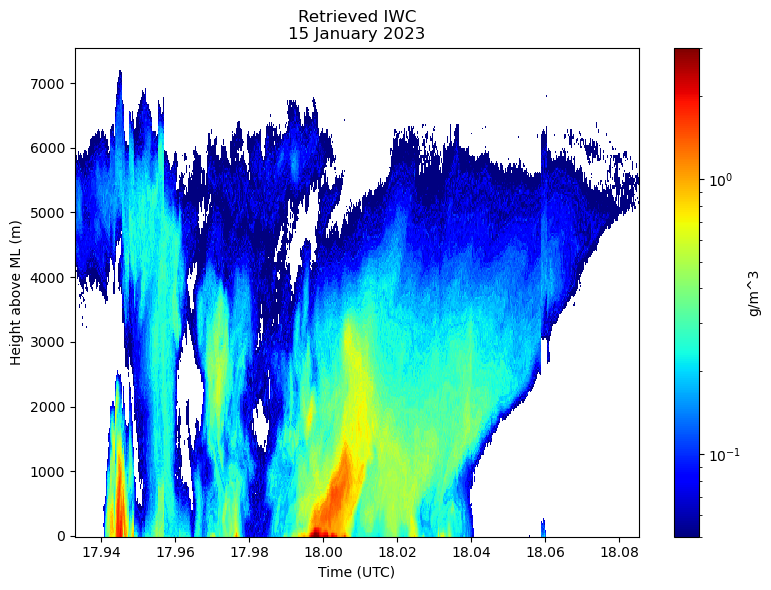

In [345]:
from matplotlib.colors import LogNorm
dm=np.zeros_like(zKu1L)
iwc=np.zeros_like(zKu1L)
iwc[a]=(np.power(10,yout[:,0])-1)*1e-2
dm[a]=yout[:,1]
plt.figure(figsize=(8,6))
plt.subplot(111)
plt.pcolormesh((np.array(time_retL)-t0)/3600.,radar_range[:288]-radar_range[0],iwc[:,:-12][:,::-1].T,cmap='jet',norm=LogNorm(vmin=0.5e-1,vmax=3))
plt.xlim((time_retL[0]-t0)/3600.,(time_retL[-1]-t0)/3600.)
plt.ylabel("Height above ML (m)")
#plt.ylim(350,7200)
plt.colorbar(label="g/m^3")
plt.xlabel("Time (UTC)")
plt.title("Retrieved IWC\n15 January 2023")
plt.tight_layout()
plt.savefig("IWC_retrieved_2.png")

17.82847222222222
945
[[1.         0.31147475]
 [0.31147475 1.        ]]


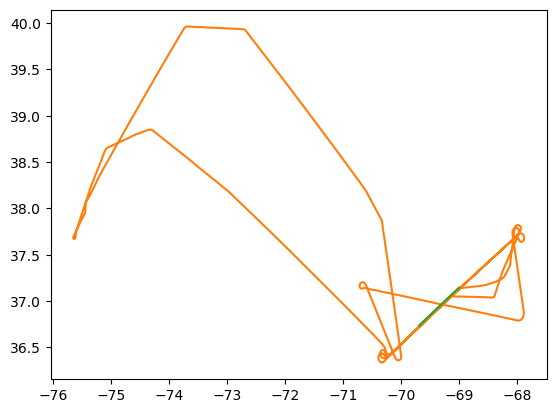

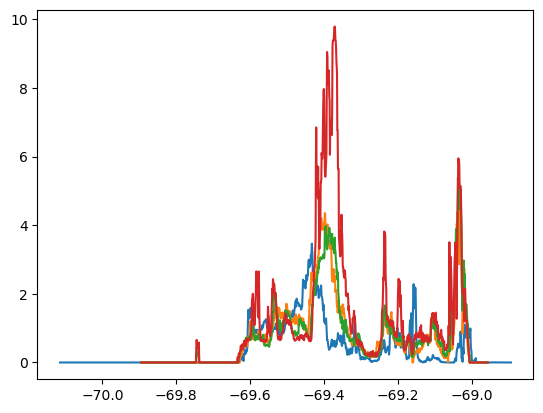

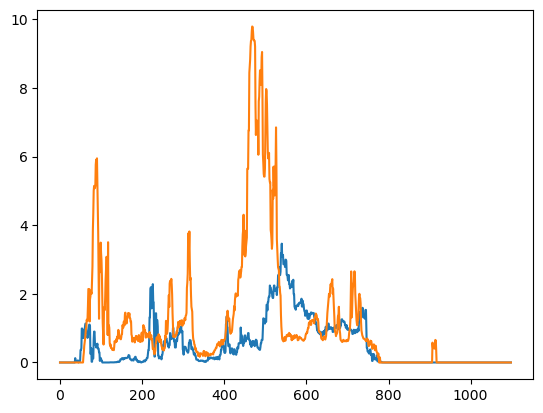

In [341]:
time_Ku
import datetime
dt=datetime.datetime(2023,1,15,0,0,0)-datetime.datetime(1970,1,1,0,0,0)
t0=dt.total_seconds()
print((time_Ku[0]-t0)/3600)
#print(fh[])
#with nc.Dataset('IMPACTS_MergedHorizontal-P3_20230115_sizedistributions_v01.nc') as f:
with nc.Dataset('IMPACTS_MergedHorizontal-P3_20230115_sizedistributions_v01.nc') as f:
    lat_ncar=f['LAT'][:]
    lon_ncar=f['LON'][:]
    alt_ncar=f['GALT'][:]
    time_ncar=f['time'][:]
    #print(f)
    #temp_ncar=f['TEMP'][:]
    IWC=f['IWC'][:]

with nc.Dataset('IMPACTS_MergedHorizontal-P3_20230115_bf.nc') as f:
    IWC_bf=f['iwc_bf'][:]
    
a_ncar=np.nonzero((time_ncar-(time_Ku[700]-t0))*(time_ncar-(time_Ku[1990]+300-t0))<=0)
print(len(a_ncar[0]))
plt.plot(lon_ncar[a_ncar],lat_ncar[a_ncar])
plt.plot(lon_ncar,lat_ncar)
#plt.plot(alt_ncar[a_ncar])
plt.plot(lon[800:1600],lat[800:1600])
plt.figure()
plt.plot(lon_ncar[a_ncar],IWC[a_ncar])
plt.plot(lonL,iwc[:,-30])
plt.plot(lonL,iwc[:,-20])
plt.plot(lonL,iwc[:,-12])
iwcL=[]
dtL=[]
for irec,iwc1 in enumerate(iwc[:,-12]):
    ind=np.argmin(np.abs(lon_ncar[a_ncar]-lonL[irec])+np.abs(lat_ncar[a_ncar]-latL[irec]))
    iwcL.append(IWC[a_ncar][ind])
    dtL.append(time_ncar[a_ncar][ind]-(timeL[irec]-t0))
print(np.corrcoef(iwcL,iwc[:,-12]))
plt.figure()
plt.plot(iwcL)
plt.plot(iwc[:,-12])


6654
1673740800.0
1608


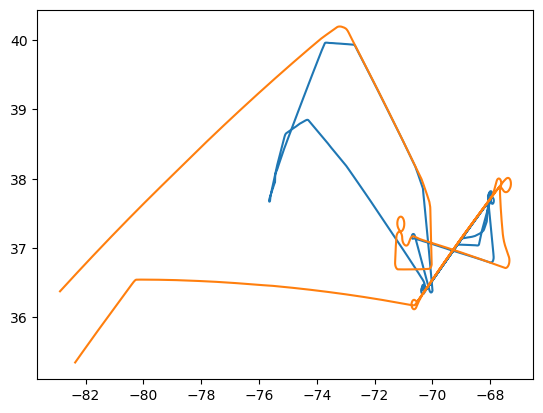

In [342]:

aiwc=np.nonzero(IWC>0)
print(len(aiwc[0]))
info_ncar=np.zeros((len(aiwc[0]),5))
info_ncar[:,0]=lon_ncar[aiwc]
info_ncar[:,1]=lat_ncar[aiwc]
info_ncar[:,2]=time_ncar[aiwc]
info_ncar[:,3]=alt_ncar[aiwc]
info_ncar[:,4]=IWC[aiwc]
lon_ncarm=np.mean(lon_ncar[aiwc])
lat_ncarm=np.mean(lat_ncar[aiwc])
time_ncarm=np.mean(alt_ncar[aiwc])
lon_ncars=np.std(lon_ncar[aiwc])
lat_ncars=np.std(lat_ncar[aiwc])
time_ncars=np.std(alt_ncar[aiwc])
info_ncar[:,0]=(info_ncar[:,0]-lon_ncarm)/lon_ncars
info_ncar[:,1]=(info_ncar[:,1]-lat_ncarm)/lat_ncars
info_ncar[:,2]=(info_ncar[:,2]-time_ncarm)/time_ncars

with nc.Dataset('/Users/mgrecu/AirborneData/IMPACTS2023_HIWRAP_KU_L1B_Rev-_20230115.h5') as f:
    time_Ku_all=f["Time/Data/TimeUTC"][:]
    lon_Ku_all=f["Navigation/Data/Longitude"][:]
    lat_Ku_all=f["Navigation/Data/Latitude"][:]

info_Ku=np.zeros((len(lon_Ku_all),3))
info_Ku[:,0]=(lon_Ku_all-lon_ncarm)/lon_ncars
info_Ku[:,1]=(lat_Ku_all-lat_ncarm)/lat_ncars
info_Ku[:,2]=(time_Ku_all-t0-time_ncarm)/time_ncars
iprof=[]
print(t0)
plt.plot(lon_ncar,lat_ncar)
plt.plot(lon_Ku_all,lat_Ku_all)
matched_dataL=[]
for ie,i in enumerate(aiwc[0]):
    dmin=np.abs(lon_ncar[i]-lon_Ku_all)+np.abs(lat_ncar[i]-lat_Ku_all)+np.abs(time_ncar[i]+t0-time_Ku_all)/360.0/5
    ind=np.argmin(dmin)
    if dmin[ind]<0.05:
        iprof.append(ind)
        #print(lon_ncar[ie],lat_ncar[ie],time_ncar[ie],alt_ncar[ie],IWC[ie],lon_Ku_all[ind],lat_Ku_all[ind],time_Ku[ind]-t0)
        matched_dataL.append([lon_ncar[i],lat_ncar[i],time_ncar[i],alt_ncar[i],IWC[i],lon_Ku_all[ind],lat_Ku_all[ind],time_Ku_all[ind]-t0,ind,i,IWC_bf[i-1:i+2].mean()])
print(len(iprof))

import xarray as xr
matched_dataX=xr.DataArray(np.array(matched_dataL),dims=['prof','info'])
infoString=["lon_ncar","lat_ncar","time_ncar","alt_ncar","IWC","lon_Ku","lat_Ku","time_Ku","iprof","irec","IWC_bf"]
matched_dataX=matched_dataX.assign_coords(info=infoString)
ds=xr.Dataset({'coincidence_data':matched_dataX})
ds.to_netcdf('coincidence_vertical_data_15Jan2023_2.nc')

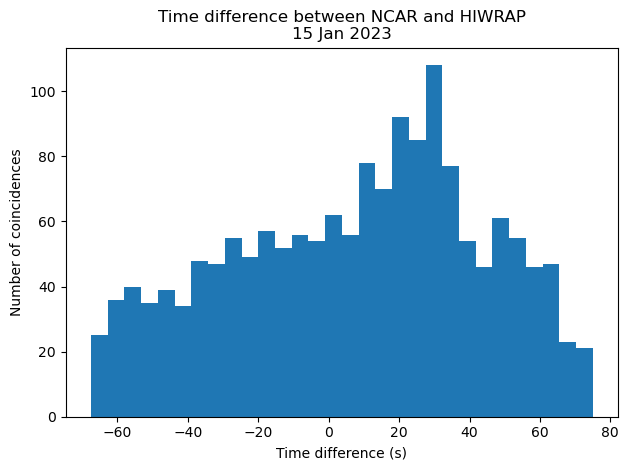

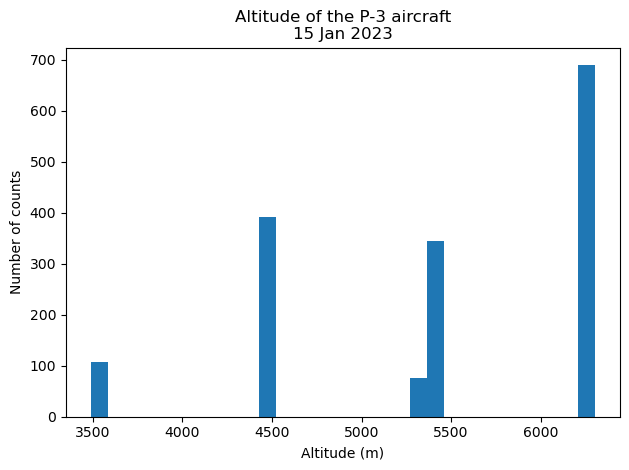

In [320]:
h1=plt.hist(matched_dataX[:,2]-matched_dataX[:,7],bins=30)
plt.xlabel("Time difference (s)")
plt.ylabel("Number of coincidences")
plt.title("Time difference between NCAR and HIWRAP\n15 Jan 2023")
plt.tight_layout()
plt.savefig("TimeDifference.png")
plt.figure()
h2=plt.hist(matched_dataX[:,3],bins=30)
plt.xlabel("Altitude (m)")
plt.ylabel("Number of counts")
plt.title("Altitude of the P-3 aircraft\n15 Jan 2023")
plt.tight_layout()
plt.savefig("Altitude.png")



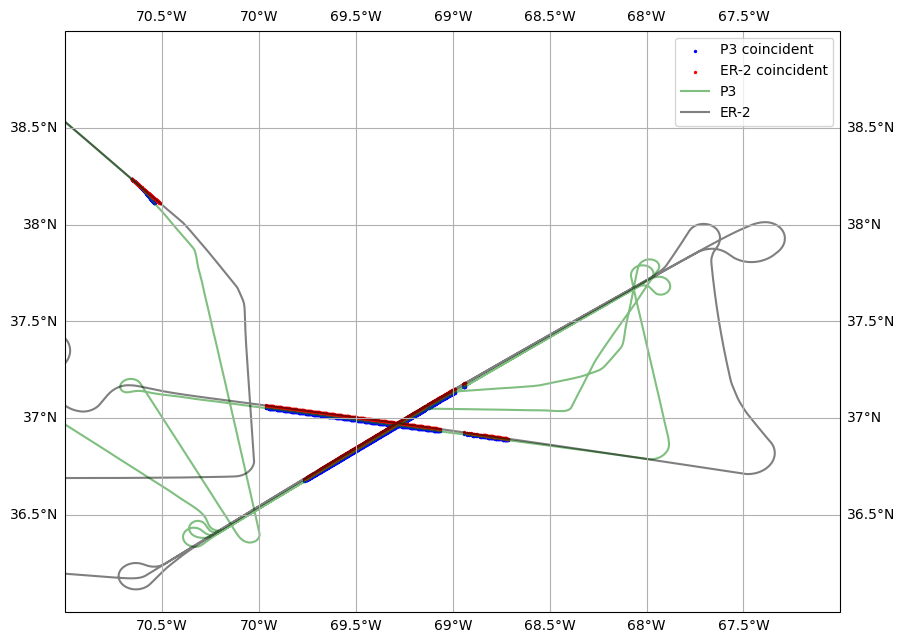

In [250]:
matched_dataL=np.array(matched_dataL)
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(10,10))
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(matched_dataL[:,0],matched_dataL[:,1],s=2,color='blue',label='P3 coincident')
plt.scatter(matched_dataL[:,5],matched_dataL[:,6],s=2,color='red',label='ER-2 coincident')
plt.plot(lon_ncar,lat_ncar,'g',alpha=0.5,label='P3')
plt.plot(lon_Ku_all,lat_Ku_all,'k',alpha=0.5,label='ER-2')
plt.xlim(-71,-67)
plt.ylim(36,39)
#add gridlines
ax.gridlines(draw_labels=True)
plt.legend()
plt.savefig('coincidentTracks.png')

In [312]:


#plt.scatter(matched_dataL[:,0],matched_dataL[:,1],s=2,color='blue',label='P3 coincident')
#plt.scatter(matched_dataL[:,5],matched_dataL[:,6],s=2,color='red',label='ER-2 coincident')
#plt.plot(lon_ncar,lat_ncar,'g',alpha=0.5,label='P3')
t_sample=np.linspace(time_Ku_all[0]-t0,time_Ku_all[-1]-t0,300)
import os
import PIL
for i in range(60,299):
    plt.figure(figsize=(10,10))
    ax=plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    a=np.nonzero((time_Ku_all-t0-t_sample[i]+45)*(time_Ku_all-t0-t_sample[i]-45)<=0)
    plt.plot(lon_Ku_all[a],lat_Ku_all[a],'r',linewidth=5,label='ER-2')
    b=np.nonzero((time_ncar-t_sample[i]+45)*(time_ncar-t_sample[i]-80)<=0)
    time_label=(time_Ku_all[a[0][0]]-t0)/3600.
    plt.plot(lon_ncar[b],lat_ncar[b],'g',linewidth=5,label='P3')
    plt.title('Aircraft position on 15 Jan 2023 at %5.2f UTC'%time_label)
#plt.plot(lon_Ku_all,lat_Ku_all,'k',alpha=0.5,label='ER-2')
    plt.xlim(-72,-67)
    plt.ylim(36,40)
#add gridlines
    ax.gridlines(draw_labels=True)
    plt.legend()
    plt.tight_layout()
    plt.savefig('tmp/coincidentTracks%3.3i.png'%i)
    #read the image
    img=PIL.Image.open('tmp/coincidentTracks%3.3i.png'%i)
    #convert the image to a gif
    img.save('tmp/coincidentTracks%3.3i.gif'%i)
    plt.close('all')
    #os.system('convert coincidentTracks%2.2i.png coincidentTracks%2.2i.gif'%(i,i))
    #break
#break

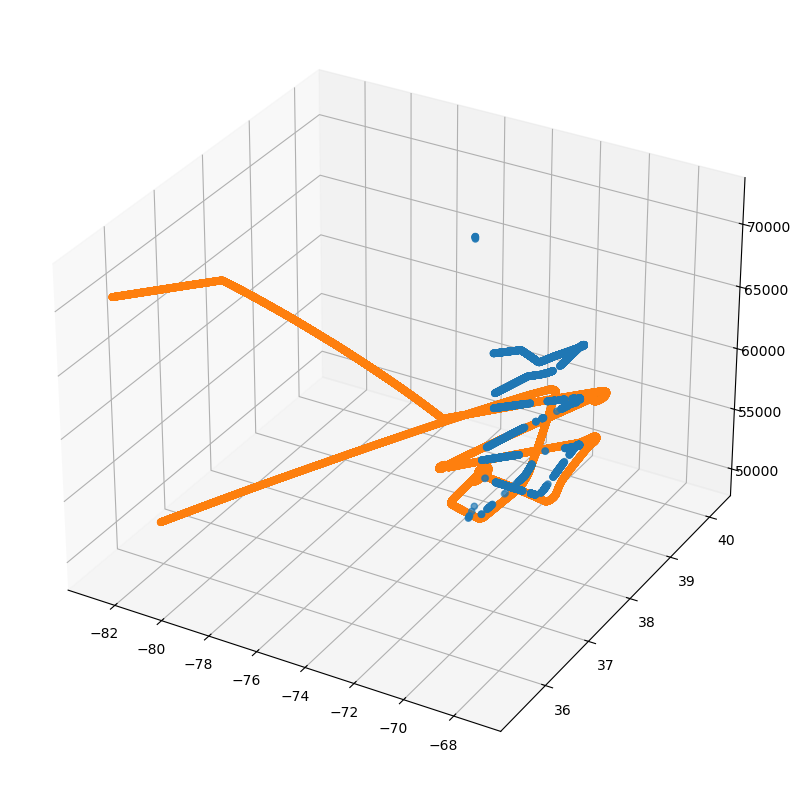

In [195]:
# make 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lon_ncar[aiwc],lat_ncar[aiwc],time_ncar[aiwc])
ax.scatter(lon_Ku_all[:],lat_Ku_all[:],time_Ku_all[:]-t0)

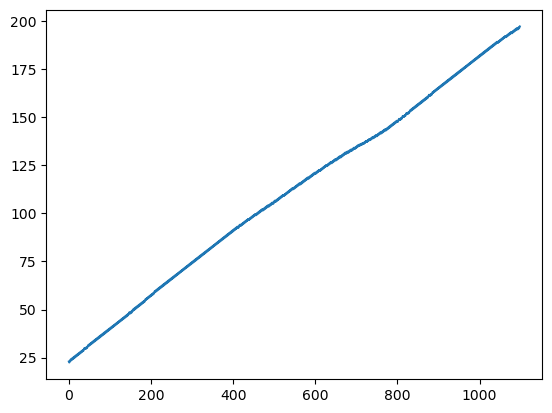

In [172]:
plt.plot(dtL)

In [3]:
with nc.Dataset('profiles137/saf137.nc') as f:
    qv=f['hum'][:]
    temp=f['temp'][:]
    dz=f['dz'][:]
    p=f['pap'][:]
    rain=f['rain'][:]*3600 # convert from kg/m^2/s to mm/h
    snow=f['snow'][:]*3600 # convert from kg/m^2/s to mm/h
rho=p/(287.05*temp)

58


(0.0, 10000.0)

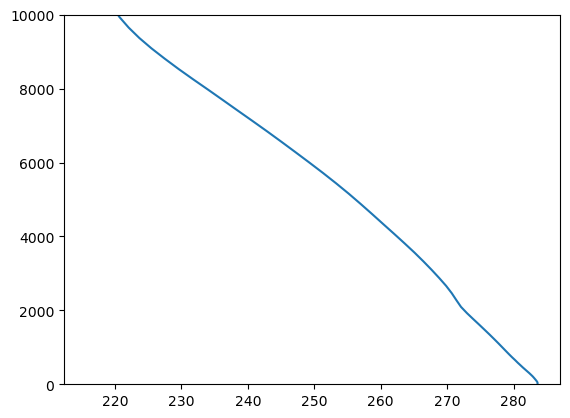

In [12]:
iprof=0
ecmwf_temp=[]
ecmwf_qv=[]
ecmwf_rho=[]
ecmwf_p=[]
ecmwf_rain=[]
ecmwf_snow=[]
ecmwf_h=[]
for i,temp1 in enumerate(temp):
    temp1_=temp1[::-1]
    qv1=qv[i,::-1]
    h1=np.cumsum(dz[i,::-1])
    p1=p[::-1]
    rho1=rho[i,::-1]
    rain1=rain[i][::-1]
    snow1=snow[i][::-1]
    a=np.nonzero(temp1_<273.15)
    if abs(h1[a[0][0]]-2000)<100:
        #print(i,h1[a[0][0]],temp1_[a[0][0]],qv1[a[0][0]],rho1[a[0][0]],rain1[a[0][0]],snow1[a[0][0]])
        ecmwf_temp.append(temp1_[:])
        ecmwf_qv.append(qv1[:])
        ecmwf_rho.append(rho1[:])
        ecmwf_p.append(p1[:])
        ecmwf_rain.append(rain1[:])
        ecmwf_snow.append(snow1[:])
        ecmwf_h.append(h1[:])
        iprof+=1
print(iprof)
ecmwf_temp=np.array(ecmwf_temp)
ecmwf_qv=np.array(ecmwf_qv)
ecmwf_rho=np.array(ecmwf_rho)
ecmwf_p=np.array(ecmwf_p)
ecmwf_rain=np.array(ecmwf_rain)
ecmwf_snow=np.array(ecmwf_snow)
ecmwf_h=np.array(ecmwf_h)
plt.plot(ecmwf_temp.mean(axis=0),ecmwf_h.mean(axis=0))
plt.ylim(0,10000)

(0.0, 4.0)

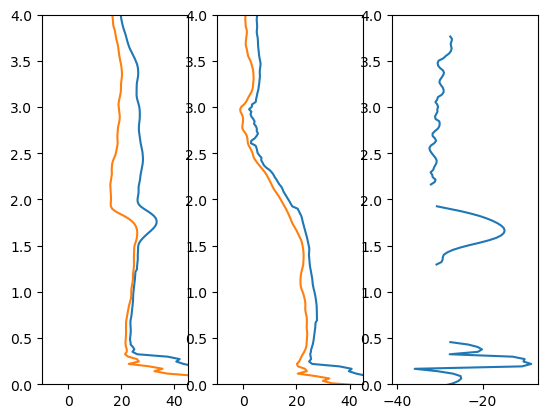

In [40]:
zKaL=np.array(zKaL)
plt.subplot(131)
plt.plot(dbz_ku[1350,:],h/1e3)
plt.plot(zKaL[1350,:],h_ka/1e3)
plt.ylim(0,4.)
plt.xlim(-10,45)
plt.subplot(132)
plt.plot(dbz_ku[890,:],h/1e3)
plt.plot(zKaL[890,:],h_ka/1e3)
plt.ylim(0,4.)
plt.xlim(-10,45)
plt.subplot(133)
plt.plot(ldr[1350,:],h/1e3)
plt.ylim(0,4)